<a href="https://colab.research.google.com/github/chiragvijay13/26thmay_B1_AI/blob/master/treadmill_dataset_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
import statsmodels.api as sm

In [ ]:
df = pd.read_csv('/content/treadmil-users.csv')
df.head()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,TM195,18,Male,14,Single,3,4,29562,112
1,TM195,19,Male,15,Single,2,3,31836,75
2,TM195,19,Female,14,Partnered,4,3,30699,66
3,TM195,19,Male,12,Single,3,3,32973,85
4,TM195,20,Male,13,Partnered,4,2,35247,47


In [ ]:
cols=df.columns


In [ ]:
for i in cols:
  print(df[i].unique())

['TM195' 'TM498' 'TM798']
[18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41
 43 44 46 47 50 45 48 42]
['Male' 'Female']
[14 15 12 13 16 18 20 21]
['Single' 'Partnered']
[3 2 4 5 6 7]
[4 3 2 1 5]
[ 29562  31836  30699  32973  35247  37521  36384  38658  40932  34110
  39795  42069  44343  45480  46617  48891  53439  43206  52302  51165
  50028  54576  68220  55713  60261  67083  56850  59124  61398  57987
  64809  47754  65220  62535  48658  54781  48556  58516  53536  61006
  57271  52291  49801  62251  64741  70966  75946  74701  69721  83416
  88396  90886  92131  77191  52290  85906 103336  99601  89641  95866
 104581  95508]
[112  75  66  85  47 141 103  94 113  38 188  56 132 169  64  53 106  95
 212  42 127  74 170  21 120 200 140 100  80 160 180 240 150 300 280 260
 360]


In [ ]:
df.apply(lambda x:x.unique())

Product                                      [TM195, TM498, TM798]
Age              [18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 2...
Gender                                              [Male, Female]
Education                         [14, 15, 12, 13, 16, 18, 20, 21]
MaritalStatus                                  [Single, Partnered]
Usage                                           [3, 2, 4, 5, 6, 7]
Fitness                                            [4, 3, 2, 1, 5]
Income           [29562, 31836, 30699, 32973, 35247, 37521, 363...
Miles            [112, 75, 66, 85, 47, 141, 103, 94, 113, 38, 1...
dtype: object

observations
## 1 we got three types of prod.
##2 male and femlae
##3 married and single
##4 age 18-50
##5 usage 2-7hr per week


In [ ]:
df['Product'].value_counts()

TM195    80
TM498    60
TM798    40
Name: Product, dtype: int64

In [ ]:
df['Fitness'].value_counts()

3    97
5    31
2    26
4    24
1     2
Name: Fitness, dtype: int64

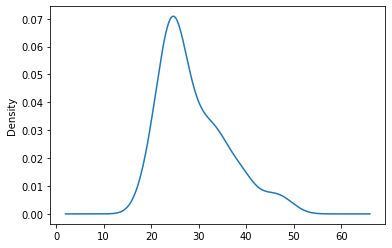

In [ ]:
df['Age'].plot.kde()

In [ ]:
df.groupby('Usage').describe().T

Usage                       2             3  ...             6             7
Age       count     33.000000     69.000000  ...      7.000000      2.000000
          mean      28.484848     28.985507  ...     29.571429     28.500000
          std        6.892574      7.387375  ...      5.126960      0.707107
          min       19.000000     18.000000  ...     25.000000     28.000000
          25%       25.000000     23.000000  ...     26.500000     28.250000
          50%       26.000000     26.000000  ...     28.000000     28.500000
          75%       31.000000     35.000000  ...     30.500000     28.750000
          max       48.000000     50.000000  ...     40.000000     29.000000
Education count     33.000000     69.000000  ...      7.000000      2.000000
          mean      14.939394     15.115942  ...     17.857143     16.000000
          std        1.197377      1.243054  ...      1.676163      2.828427
          min       12.000000     12.000000  ...     16.000000     14.000000
          25%       14.000000     14.000000  ...     17.000000     15.000000
          50%       15.000000     16.000000  ...     18.000000     16.000000
          75%       16.000000     16.000000  ...     18.000000     17.000000
          max       18.000000     18.000000  ...     21.000000     18.000000
Fitness   count     33.000000     69.000000  ...      7.000000      2.000000
          mean       2.515152      3.000000  ...      4.857143      5.000000
          std        0.565752      0.641689  ...      0.377964      0.000000
          min        1.000000      1.000000  ...      4.000000      5.000000
          25%        2.000000      3.000000  ...      5.000000      5.000000
          50%        3.000000      3.000000  ...      5.000000      5.000000
          75%        3.000000      3.000000  ...      5.000000      5.000000
          max        3.000000      5.000000  ...      5.000000      5.000000
Income    count     33.000000     69.000000  ...      7.000000      2.000000
          mean   46870.636364  47921.753623  ...  84483.142857  81548.500000
          std     8314.144344   9793.172992  ...   8145.908921   6162.435598
          min    31836.000000  29562.000000  ...  70966.000000  77191.000000
          25%    43206.000000  40932.000000  ...  79681.000000  79369.750000
          50%    46617.000000  47754.000000  ...  88396.000000  81548.500000
          75%    52302.000000  54576.000000  ...  90263.500000  83727.250000
          max    65220.000000  68220.000000  ...  92131.000000  85906.000000
Miles     count     33.000000     69.000000  ...      7.000000      2.000000
          mean      58.545455     83.420290  ...    212.857143    240.000000
          std       19.979819     18.289667  ...     47.858920     84.852814
          min       21.000000     47.000000  ...    150.000000    180.000000
          25%       47.000000     74.000000  ...    180.000000    210.000000
          50%       56.000000     85.000000  ...    200.000000    240.000000
          75%       66.000000     95.000000  ...    250.000000    270.000000
          max      113.000000    127.000000  ...    280.000000    300.000000

[40 rows x 6 columns]

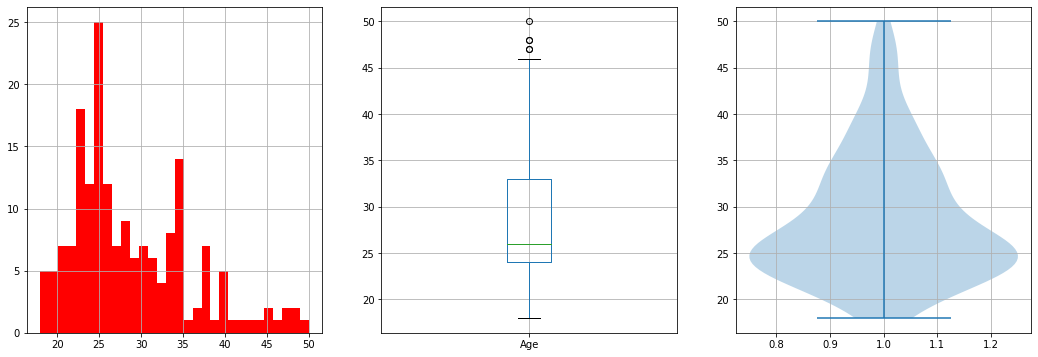

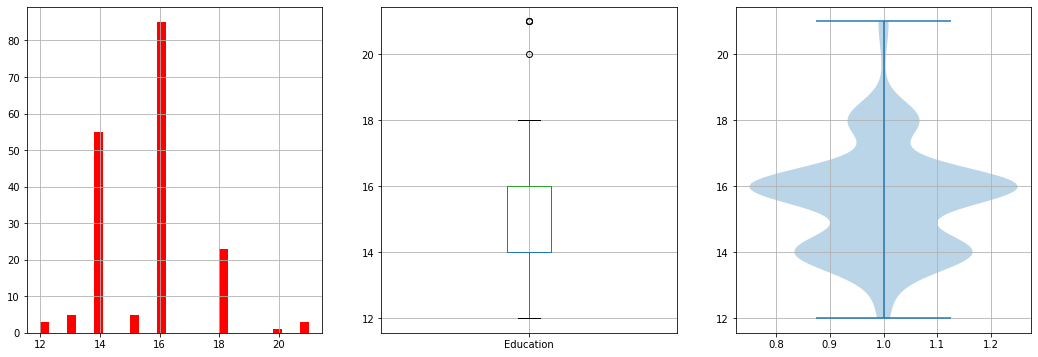

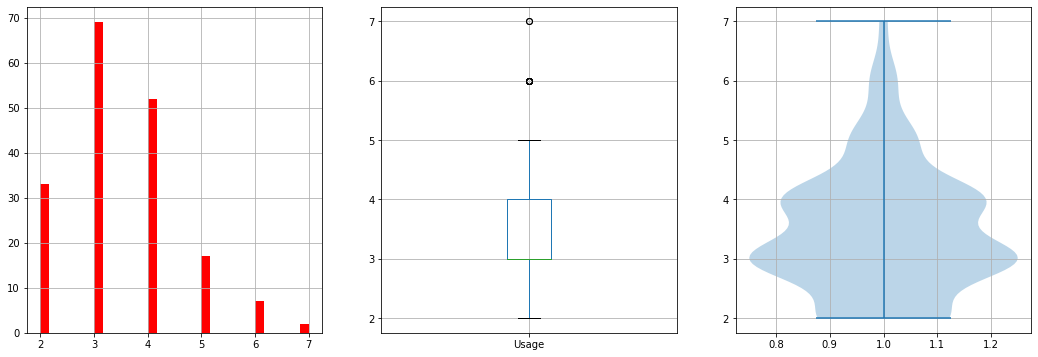

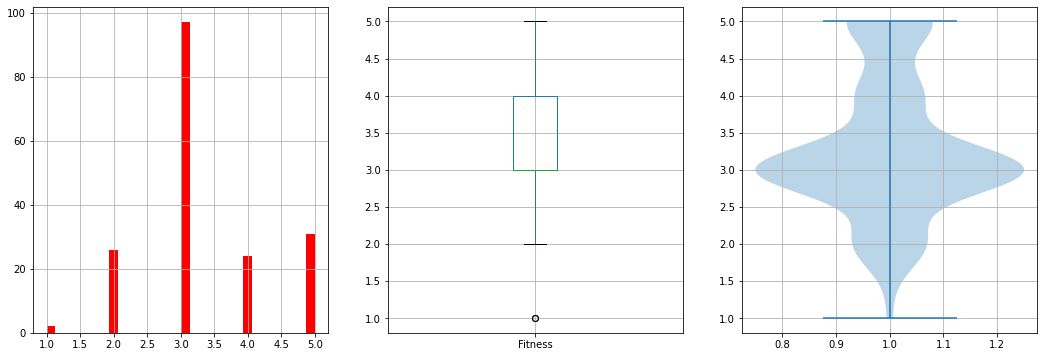

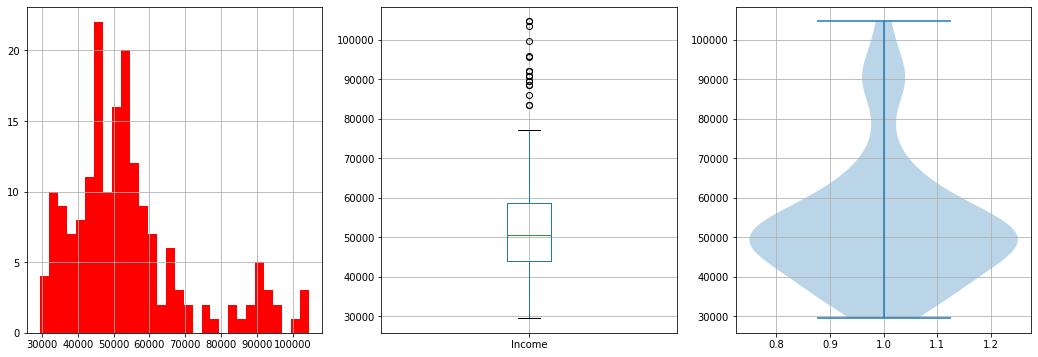

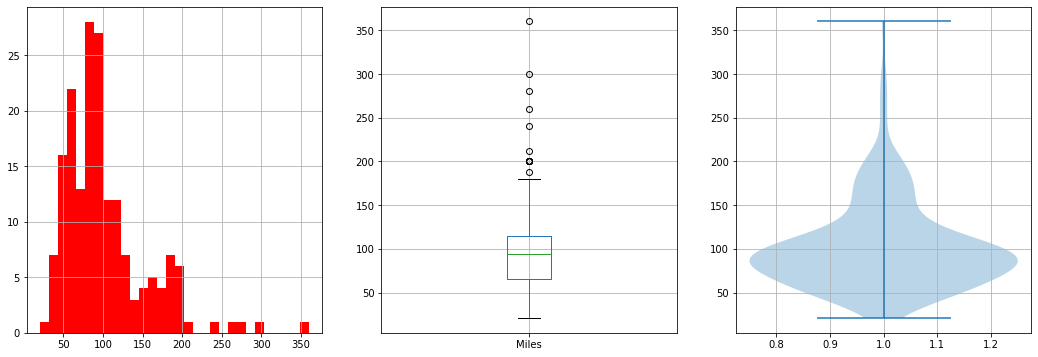

In [ ]:
for i in ['Age','Education','Usage','Fitness','Income','Miles']:
  plt.figure(figsize=(18,6))
  plt.subplot(1,3,1)
  plt.hist(df[i], bins=30,color='red')
  plt.grid()

  plt.subplot(1,3,2)
  df[i].plot.box()
  plt.grid()

  plt.subplot(1,3,3)
  plt.violinplot(df[i])
  plt.grid()

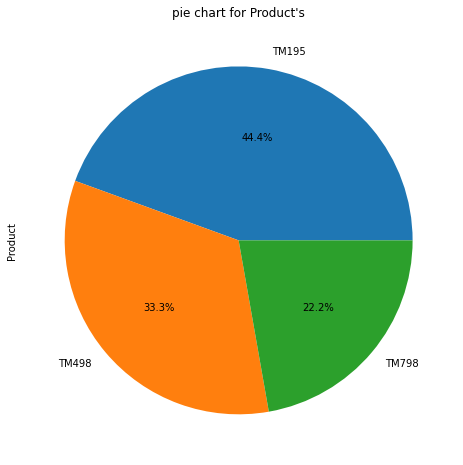

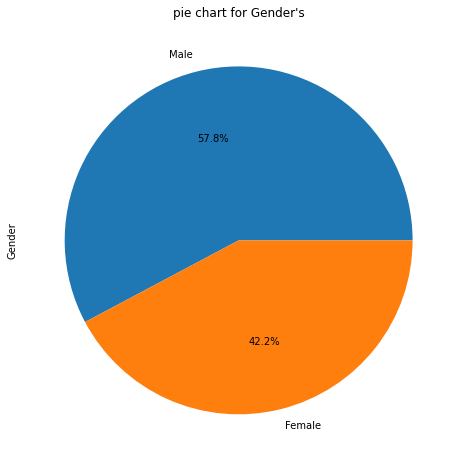

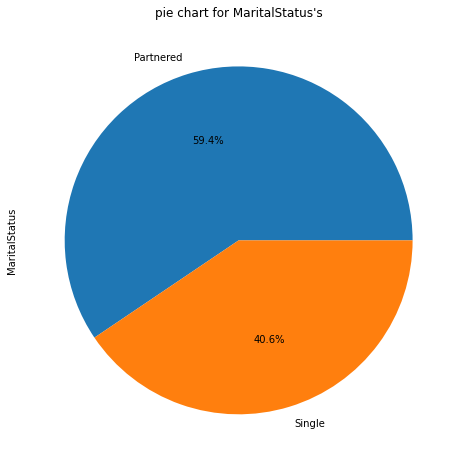

<Figure size 432x288 with 0 Axes>

In [ ]:
for i in ['Product','Gender','MaritalStatus']:
  df[i].value_counts().plot.pie(autopct='%.1f%%', figsize=(8,8) )
  plt.title("pie chart for {}'s".format(i))
  plt.figure()

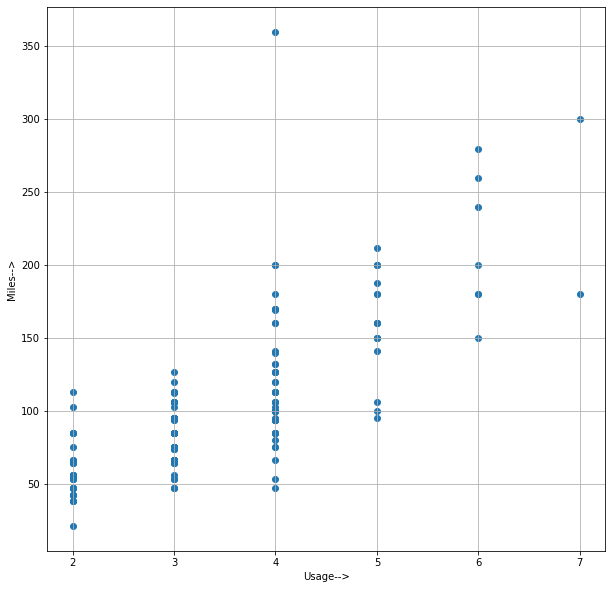

In [ ]:
plt.figure(figsize=(10,10))
plt.xlabel('Usage-->')
plt.ylabel('Miles-->')
plt.scatter(df['Usage'],df['Miles'])
plt.grid()

In [62]:
df.groupby('Product')['Gender'].value_counts()

Product  Gender
TM195    Female    40
         Male      40
TM498    Male      31
         Female    29
TM798    Male      33
         Female     7
Name: Gender, dtype: int64

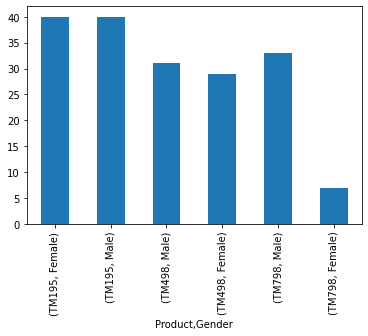

In [64]:
df.groupby('Product')['Gender'].value_counts().plot.bar()

In [63]:
pd.crosstab(df['Product'],df['Gender'])

Gender,Female,Male
Product,,
TM195,40,40
TM498,29,31
TM798,7,33


In [67]:
pd.crosstab(df['Product'],df['MaritalStatus'])

MaritalStatus,Partnered,Single
Product,,
TM195,48,32
TM498,36,24
TM798,23,17


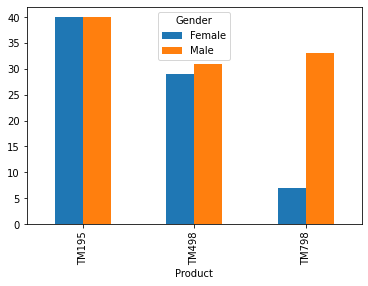

In [65]:
pd.crosstab(df['Product'],df['Gender']).plot.bar()